### Data distribution notebook

This notebook contains some tools to read the data distribution associated with `Constraints on the cosmic expansion history from the GWTC--3`.

In order to run part of this notebook you will need a working version of the icarogw environment that you can install following [these instructions](https://git.ligo.org/cbc-cosmo/icarogw).

* **Title of the notebook**: icarogw_data_distro
* **A component of the data release of "Constraints on the cosmic expansion history from the GWTC-3"**
* **Author S. Mastrogiovanni on behalf of the LIGO Scientific Collaboration, Virgo Collaboration and KAGRA Collaboration**
* This software is provided under license: Creative Commons Attribution 4.0 International (https://creativecommons.org/licenses/by/4.0/legalcode)
* Questions or comments are welcome. Email simone.mastrogiovanni@ligo.org

### Description of the injection file

The injection `O1_O2_O3_det_frame_SNR9.inj` that we provide is already pickle in the icarogw injection class. The pickle object containts BBH signals with a minimum matched filter SNR of 9, meaning that you can apply SNR cuts only using SNR>9.
The injection class can be used to evaluate selection effects or expected number of detections.

See [this notebook](https://git.ligo.org/cbc-cosmo/icarogw/-/blob/main/examples/tutorial.ipynb) for more details on how to run a full icarogw analysis.


In [2]:
# import icarogw
import pickle
import corner

In [3]:
injections = pickle.load( open( "O1_O2_O3_det_frame_SNR9.inj", "rb" ) )

FileNotFoundError: [Errno 2] No such file or directory: 'O1_O2_O3_det_frame_SNR9.inj'

In [52]:
# We initialize here a prior model for redshift and mass
zp = icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(),'powerlaw',dic_param={'gamma':2.7})
mass_hp = {'alpha':2.4,'beta':1.,'mmin':5,'mmax':100}
mp = icarogw.priors.mass.mass_prior(name='BBH-powerlaw',hyper_params_dict=mass_hp) 

# We update the injection model
injections.update_cut(snr_cut=12)
injections.update_VT(mp,zp)
# We print the number of expected detections in O1 and O2 with SNR>12
print(injections.expected_number_detection(20)) # 20= merger rate today in Gpc-3 yr-1

Selecting injections with SNR 12.000000 and IFAR 0.000000 yr
34.146659628983414


/home/simone/anaconda3/envs/icarogw_test/lib/python3.9/site-packages/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
  return _np.nan_to_num(10.**_splev(_np.log10(z),self.interp_dvc_dz,ext=0))
/home/simone/anaconda3/envs/icarogw_test/lib/python3.9/site-packages/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/home/simone/anaconda3/envs/icarogw_test/lib/python3.9/site-packages/icarogw/priors/custom_math_priors.py:292: RuntimeWarning: invalid value encountered in log
  to_ret = self.alpha*_np.log(x)-_np.log(norms)


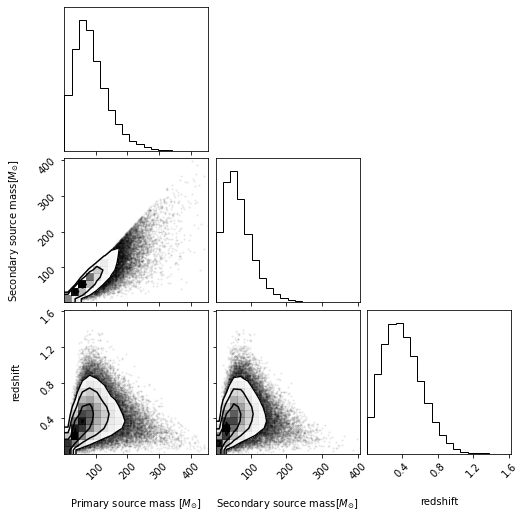

In [53]:
# Histogram the detected injections with SNR>12. Note that this is for a fixed population
_=corner.corner(np.column_stack([injections.ms1,injections.ms2,injections.z_samples]),labels=['Primary source mass $[M_{\odot}]$',
                                                                                              'Secondary source mass$[M_{\odot}]$',
                                                                                             'redshift'])

### Description of the Result file

You can read files with:

```
import json
f = open('O3_icarogw_data_distro.json')
data = json.load(f)
```

The `data` variable will be a dictionary with several fields each one for the different runs that we perform. The fields are in general named as `SNR_XX_MASS_MODEL_COSMOLOGY`, where `XX` referes to the SNR cut used for the study. Each of the runs has additional fields corresponding to the population parameters which are being sampled. In general (see App. A on the publicaiton for more details)

Parameters in common to all the runs
* `mmax`: Maximum mass of the source mass in solar masses
* `mmin`: Minimum mass of the source mass in solar masses
* `beta`: Powerlaw (positive) exponential for the secondary source mass
* `H0`: Hubble constant in  km/s/Mpc
* `Om0`: Matter density fraction
* `w0`: Dark Energy EOS parameter.
* `gamma`: Rate evolution parameter (numerator)
* `kappa`: Rate evolution parameter (denominator)
* `zp`: Redshift for the peak of the star formation rate
* `R0`: BBHs Merger rate today in Gpc-3 yr-1

Parameters related to Broken powerlaw model only
* `alpha_1`: Powerlaw (negative) exponential for the primary source mass before the breaking point 
* `alpha_2`: Powerlaw (negative) exponential for the primary source mass after the breaking point 
* `b`: Breaking point, fractional w.r.t mmax and mmin
* `delta_m`: Tapering factor for the lower end of the mass spectrum in solar masses


Parameters related to Powerlaw + peak model only
* `alpha`: Powerlaw (negative) exponential for the primary source mass
* `mu_g`: Mean of the gaussian peak in solar masses
* `sigma_g`: Standard deviation of the gaussian peak in solar masses
* `lambda_peak`: Fraction of events born in the gaussian peak
* `delta_m`: Tapering factor for the lower end of the mass spectrum in solar masses

Parameters related to Truncated powerlaw
* `alpha`: Powerlaw (negative) exponential for the primary source mass




In [5]:
# Read the data distribution
import json
import corner.corner
import matplotlib.pyplot as plt
import numpy as np
f = open('/home/aditya/Downloads/O3_icarogw_data_distro.json')
data = json.load(f)

In [6]:
# We print here the different runs that we perform
list(data.keys())

['SNR_10_BBH-broken-powerlaw_w0flatLCDM',
 'SNR_11_BBH-broken-powerlaw_w0flatLCDM',
 'SNR_12_BBH-broken-powerlaw_w0flatLCDM',
 'SNR_10_BBH-powerlaw-gaussian_w0flatLCDM',
 'SNR_11_BBH-powerlaw-gaussian_w0flatLCDM',
 'SNR_12_BBH-powerlaw-gaussian_w0flatLCDM',
 'SNR_10_BBH-powerlaw_w0flatLCDM',
 'SNR_11_BBH-powerlaw_w0flatLCDM',
 'SNR_12_BBH-powerlaw_w0flatLCDM',
 'SNR_10_BBH-broken-powerlaw_restricted-flatLCDM',
 'SNR_11_BBH-broken-powerlaw_restricted-flatLCDM',
 'SNR_12_BBH-broken-powerlaw_restricted-flatLCDM',
 'SNR_10_BBH-powerlaw-gaussian_restricted-flatLCDM',
 'SNR_11_BBH-powerlaw-gaussian_restricted-flatLCDM',
 'SNR_12_BBH-powerlaw-gaussian_restricted-flatLCDM',
 'SNR_10_BBH-powerlaw_restricted-flatLCDM',
 'SNR_11_BBH-powerlaw_restricted-flatLCDM',
 'SNR_12_BBH-powerlaw_restricted-flatLCDM']

In [56]:
## Use this block to access population posterior samples from some of the runs
snr_cut = 11 
mass_model = 'BBH-powerlaw-gaussian'
cosmology_model = 'w0flatLCDM'
############
sub_data=data['_'.join(['SNR',str(snr_cut),mass_model,cosmology_model])]
print('For the model that you selected, the population variables are {:s}.'.format(', '.join(sub_data.keys())))

For the model that you selected, the population variables are gamma, kappa, zp, R0, alpha, beta, mmax, mmin, mu_g, sigma_g, lambda_peak, delta_m, H0, Om0, w0.


For the model that you selected, the population variables are gamma, kappa, zp, R0, alpha, beta, mmax, mmin, mu_g, sigma_g, lambda_peak, delta_m, H0, Om0, w0.
For the model that you selected, the population variables are gamma, kappa, zp, R0, alpha, beta, mmax, mmin, mu_g, sigma_g, lambda_peak, delta_m, H0, Om0, w0.
For the model that you selected, the population variables are gamma, kappa, zp, R0, alpha, beta, mmax, mmin, mu_g, sigma_g, lambda_peak, delta_m, H0, Om0, w0.


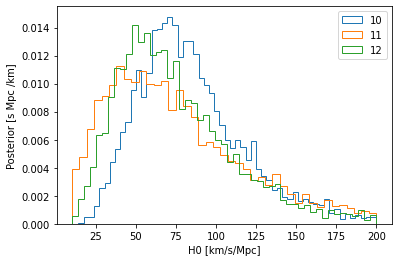

In [10]:
# Histogram the Hubble constant posterior, marginalized
for snr_cut in [10, 11, 12]: 
    mass_model = 'BBH-powerlaw-gaussian'
    cosmology_model = 'w0flatLCDM'
    ############
    sub_data=data['_'.join(['SNR',str(snr_cut),mass_model,cosmology_model])]
    print('For the model that you selected, the population variables are {:s}.'.format(', '.join(sub_data.keys())))
    _=plt.hist(sub_data['H0'],bins='auto',density=True, histtype="step", label=snr_cut)
    plt.xlabel('H0 [km/s/Mpc]')
    plt.ylabel('Posterior [s Mpc /km]')
plt.legend()

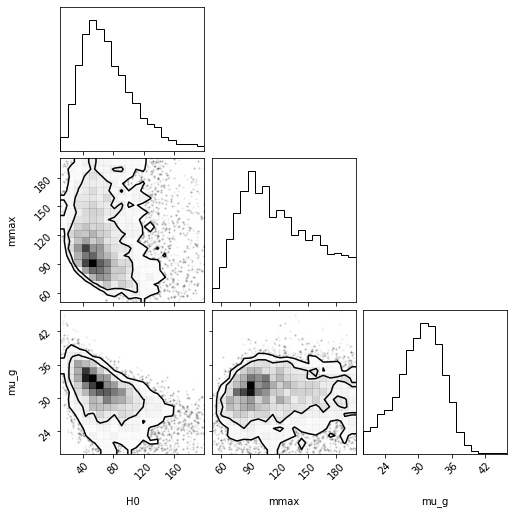

In [11]:
# Make joint posterior plot using corner
variables_to_plot = ['H0','mmax','mu_g'] # We will do a joint plot of the posterior for H0, the maximum BH mass and mu_g (position gaussian peak)
to_plot=np.column_stack([sub_data[var] for var in variables_to_plot])
_=corner.corner(to_plot,labels=variables_to_plot,levels=[0.68,0.90])